### Experiments

#### Import Libraries

In [1]:
from utils.data_utils import split_dataset, TimeSeriesDataset
from utils.evaluation_utils import plot_multistep_forecast
from utils.training_utils import train
import pandas as pd 
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

/home/codespace/.python/current/lib/python3.10/site-packages/pytorch_forecasting/models/base_model.py:30: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


#### Import Data

In [2]:
ETTm2 = pd.read_csv("/workspaces/time_series_experiment/ETT-small/ETTm2.csv")
training_df, test_df = split_dataset(ETTm2, remain_same = False)

#### Multivariate Case

#### Global Parameters

In [3]:
p_lag = 192
future_steps = 96
batch_size = 8
epochs = 8
learning_rate=1.e-4
decomp_kernel_size = 24
number_of_forecasts = 100
target_column = ['OT']
feature_columns = [i for i in training_df.columns]
modelling_task = 'univariate'
n_continous_features=7
n_categorial_features=5
dataset_name = 'ETTm2'

#### ETTm2

#### RLinear

Random seed set as 42
Univatiate modelling
inflation factor = 1
Rlinear activated
Points to be estimated
Current learning rate is : 0.0001
---------------------------


Current (running) training loss at iteration 5000 : 27.76281076660156
Current (running) training loss at iteration 10000 : 26.979943203163145
Current (running) training loss at iteration 15000 : 22.682663457870483
Current (running) training loss at iteration 20000 : 19.651054382610322
Current (running) training loss at iteration 25000 : 18.318340093955992
Current (running) training loss at iteration 30000 : 18.203024580319724
Current (running) training loss at iteration 35000 : 18.078980294527327
Current (running) training loss at iteration 40000 : 17.61357323641777
Current (running) training loss at iteration 45000 : 17.220305754174127

Epoch 0: 

Train metrics: -------
Running (training) loss is 16.999630677884387.
Training MAE is 1.1135191792014127.
Training MSE is 17.06843261627602.

Test metrics: -------
Running (test) loss is 40.348645124194114.
Test MAE is 1.7240351468048518.
Test MSE is 40.43053290211806.
---------------------------
Current learning rate is : 5e-05
------------

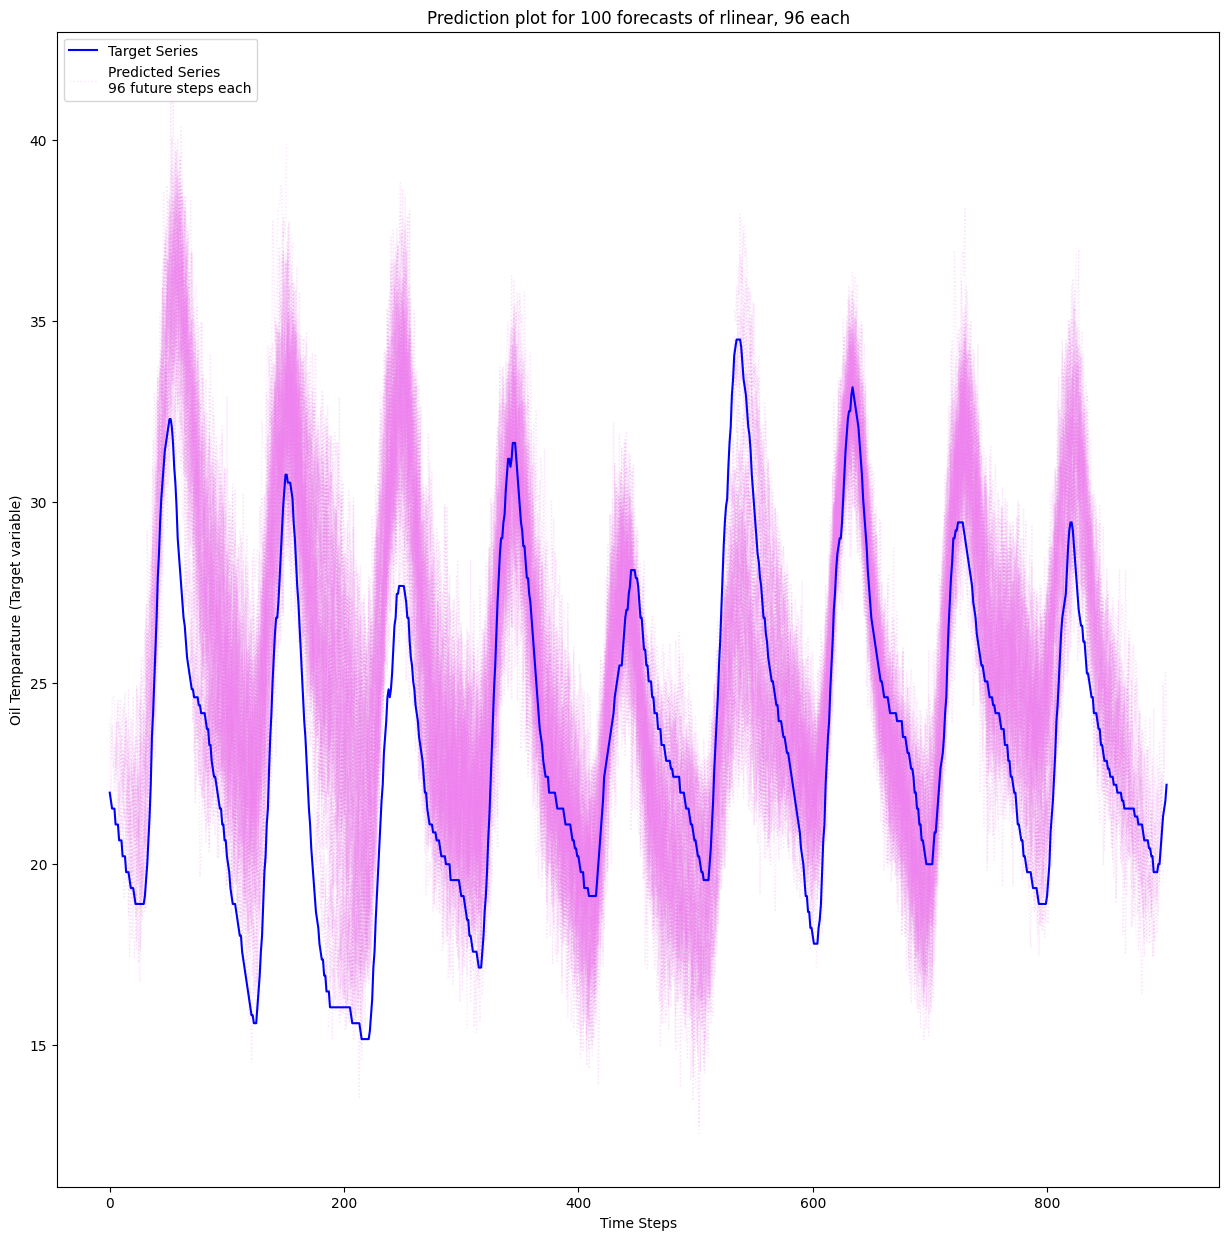

In [4]:
net = train(
            epochs = epochs, 
            n_continous_features=n_continous_features, 
            n_categorial_features=n_categorial_features,
            p_lag=  p_lag, 
            future_steps = future_steps, 
            training_df = training_df, 
            validation_df = test_df, 
            feature_columns = feature_columns,
            target_column = target_column, 
            learning_rate=learning_rate ,
            decomp_kernel_size= decomp_kernel_size, 
            batch_size=batch_size, 
            model = 'rlinear', 
            modelling_task = modelling_task, 
            dataset_name = dataset_name
            )
test_data = DataLoader(TimeSeriesDataset(test_df, future_steps= future_steps, target_column = target_column,feature_columns=feature_columns,p_lag=p_lag), batch_size=batch_size,drop_last=True)
plot_multistep_forecast(test_data=test_data, dataset_name = dataset_name, neural_net=net, future_steps=future_steps, number_of_forecasts=number_of_forecasts)

#### Dlinear

Random seed set as 42
Univatiate modelling
inflation factor = 1
Dlinear activated
Points to be estimated
With a shallow network
Current learning rate is : 0.0001
---------------------------


Current (running) training loss at iteration 5000 : 19.898081356811524
Current (running) training loss at iteration 10000 : 16.662873834609986
Current (running) training loss at iteration 15000 : 14.161476656341552
Current (running) training loss at iteration 20000 : 12.94247799911499
Current (running) training loss at iteration 25000 : 12.140400984191894
Current (running) training loss at iteration 30000 : 12.983527045059205
Current (running) training loss at iteration 35000 : 13.119456090327672
Current (running) training loss at iteration 40000 : 12.74283190460205
Current (running) training loss at iteration 45000 : 12.24958928443061

Epoch 0: 

Train metrics: -------
Running (training) loss is 12.194422628871354.
Training MAE is 0.9651558199084501.
Training MSE is 12.26087715679018.

Test metrics: -------
Running (test) loss is 29.85421529635309.
Test MAE is 1.5252060572844441.
Test MSE is 29.944109986020425.
---------------------------
Current learning rate is : 5e-05
-------------

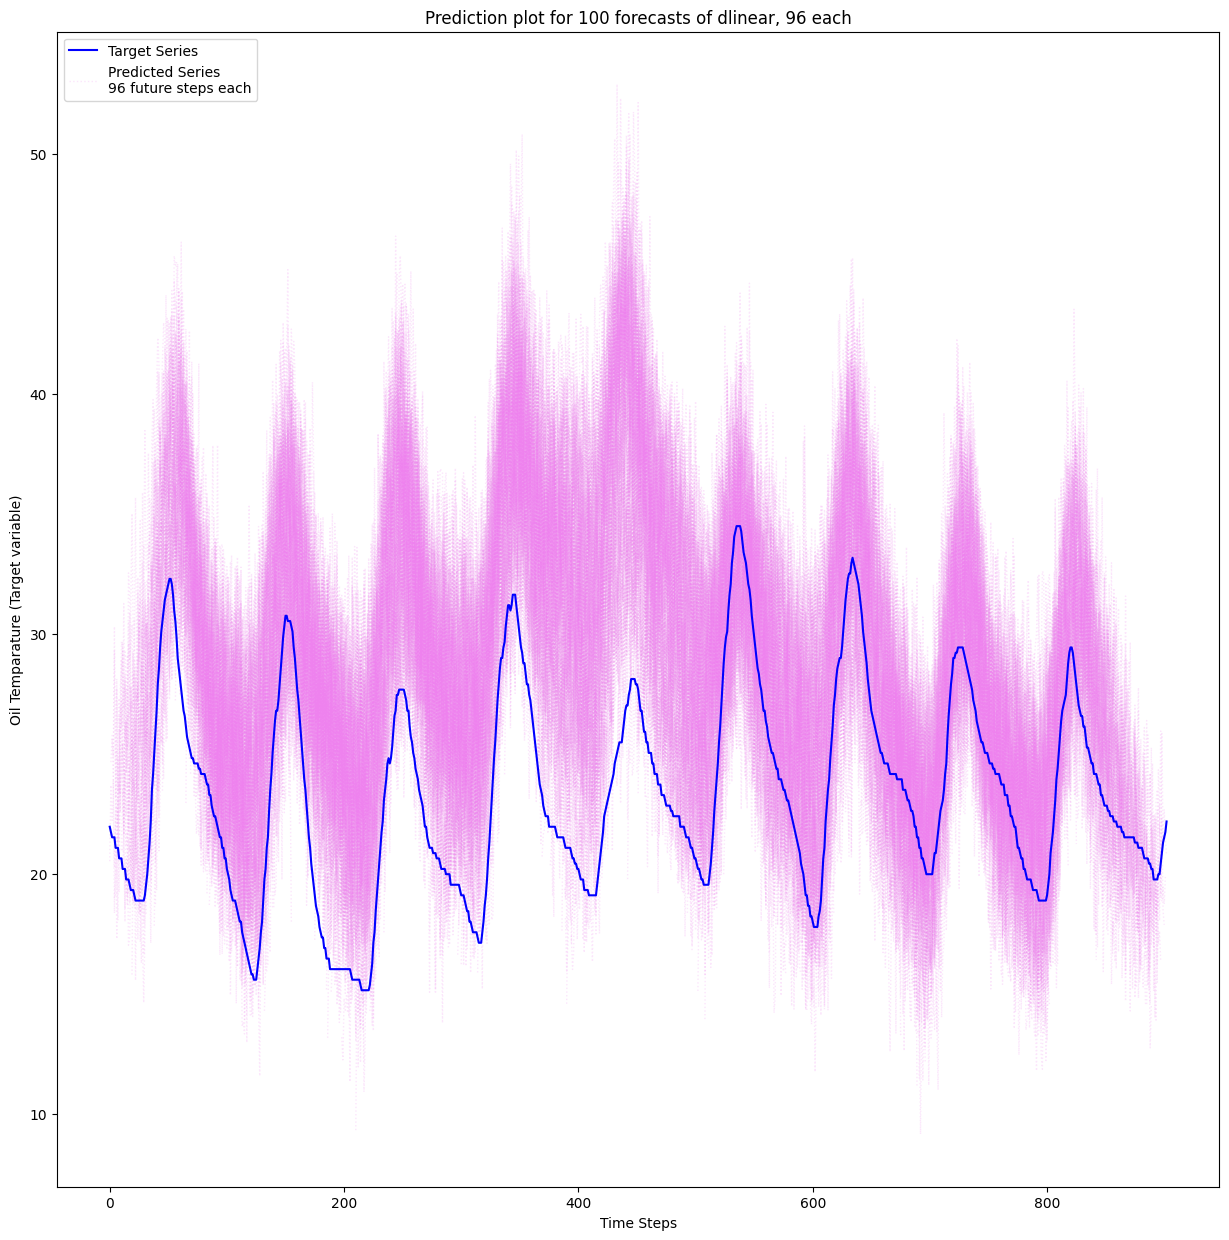

In [5]:
net = train(
            epochs = epochs, 
            n_continous_features=n_continous_features, 
            n_categorial_features=n_categorial_features,
            p_lag=  p_lag, 
            future_steps = future_steps, 
            training_df = training_df, 
            validation_df = test_df, 
            feature_columns = feature_columns,
            target_column = target_column, 
            learning_rate=learning_rate ,
            decomp_kernel_size= decomp_kernel_size, 
            batch_size=batch_size, 
            model = 'dlinear', 
            modelling_task = modelling_task, 
            dataset_name = dataset_name
            )
test_data = DataLoader(TimeSeriesDataset(test_df, future_steps= future_steps, target_column = target_column,feature_columns=feature_columns,p_lag=p_lag), batch_size=batch_size,drop_last=True)
plot_multistep_forecast(test_data=test_data, dataset_name = dataset_name, neural_net=net, future_steps=future_steps, number_of_forecasts=number_of_forecasts)

#### RLMP

In [6]:
net = train(
            epochs = epochs, 
            n_continous_features=n_continous_features, 
            n_categorial_features=n_categorial_features,
            p_lag=  p_lag, 
            future_steps = future_steps, 
            training_df = training_df, 
            validation_df = test_df, 
            feature_columns = feature_columns,
            target_column = target_column, 
            learning_rate=learning_rate ,
            decomp_kernel_size= decomp_kernel_size, 
            batch_size=batch_size, 
            model = 'rmlp', 
            modelling_task = modelling_task, 
            dataset_name = dataset_name
            )
test_data = DataLoader(TimeSeriesDataset(test_df, future_steps= future_steps, target_column = target_column,feature_columns=feature_columns,p_lag=p_lag), batch_size=batch_size,drop_last=True)
plot_multistep_forecast(test_data=test_data, dataset_name = dataset_name, neural_net=net, future_steps=future_steps, number_of_forecasts=number_of_forecasts)

Random seed set as 42
Univatiate modelling
inflation factor = 1
RMLP activated
Points to be estimated
Current learning rate is : 0.0001
---------------------------


Current (running) training loss at iteration 5000 : 46.18565492095947
Current (running) training loss at iteration 10000 : 38.96677786026001
Current (running) training loss at iteration 15000 : 30.943498924255373
Current (running) training loss at iteration 20000 : 25.220852524161337
Current (running) training loss at iteration 25000 : 22.74584988599777
Current (running) training loss at iteration 30000 : 21.486314840777716
Current (running) training loss at iteration 35000 : 20.14140264673233
Current (running) training loss at iteration 40000 : 18.71512231873274
Current (running) training loss at iteration 45000 : 17.69970289299223

Epoch 0: 

Train metrics: -------
Running (training) loss is 17.486843982707594.
Training MAE is 1.0774909481559831.
Training MSE is 17.552398836520528.

Test metrics: -------
Running (test) loss is 24.973900487825688.
Test MAE is 1.3751635314605954.
Test MSE is 25.06125491666352.
---------------------------
Current learning rate is : 5e-05
---------------

In [ ]:
peter = ''